In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [7]:
train_datagen =ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = \
train_datagen.flow_from_directory('/content/drive/MyDrive/covid 19 detection',
target_size=(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE, class_mode='binary',
subset='training')


Found 48 images belonging to 2 classes.


In [9]:
val_generator =train_datagen.flow_from_directory('/content/drive/MyDrive/covid 19 detection',
 target_size=(IMG_SIZE, IMG_SIZE),
 batch_size=BATCH_SIZE,
 class_mode='binary',
 subset='validation')

Found 12 images belonging to 2 classes.


In [10]:
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(IMG_SIZE, IMG_SIZE, 3)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator,batch_size= BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 11s/step - accuracy: 0.4236 - loss: 1.0951 - val_accuracy: 0.5000 - val_loss: 0.6776
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - accuracy: 0.5208 - loss: 0.7534 - val_accuracy: 0.5000 - val_loss: 0.7205
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.5556 - loss: 0.7076 - val_accuracy: 0.5000 - val_loss: 0.6683
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5000 - loss: 0.6607 - val_accuracy: 0.5833 - val_loss: 0.6089
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 6s/step - accuracy: 0.7431 - loss: 0.5669 - val_accuracy: 0.6667 - val_loss: 0.5261


In [13]:
model.save('/content/drive/MyDrive/covid 19 detection/covid.h5')

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/covid 19 detection/covid.h5')
print("Model Loaded")

Model Loaded


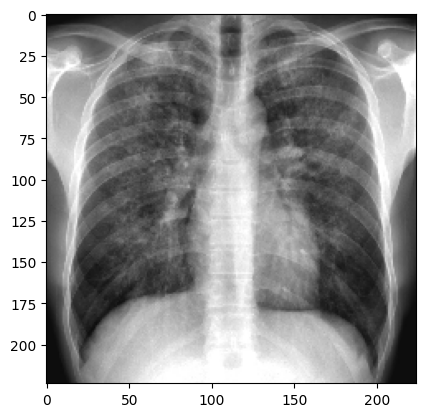

In [20]:
# Change the test_image_path to point to a specific image file within the directory
test_image_path="/content/drive/MyDrive/covid 19 detection/COVID19/C12.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [21]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255
prediction =model.predict(img_array)
print(prediction)
if prediction>= 0.5:
    print("covid 19")
else:
    print("Normal")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[0.54688895]]
covid 19
